In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import json
import numpy as np

In [2]:
EXPERIMENT_BASE_DIR = '/media/big-ssd/experiments'
EXPERIMENT_NAME = 'P3856'
EXPERIMENT_DIR = '{}/{}'.format(EXPERIMENT_BASE_DIR, EXPERIMENT_NAME)
RUN_NAME = 'P3856_YHE211_1_Slot1-1_1_5104'

In [3]:
d = pd.read_pickle('{}/identifications-pasef/exp-{}-identifications-pasef-recalibrated.pkl'.format(EXPERIMENT_DIR, EXPERIMENT_NAME))
idents_df = d['identifications_df']

In [4]:
idents_df.columns

Index(['monoisotopic_mz', 'charge', 'monoisotopic_mass', 'feature_intensity',
       'envelope_mono_peak_mz', 'envelope_mono_peak_intensity', 'envelope',
       'isotope_count', 'deconvolution_score', 'scan_apex', 'scan_lower',
       'scan_upper', 'rt_apex', 'rt_lower', 'rt_upper',
       'mono_mz_without_saturated_points', 'mono_intensity_from_raw_points',
       'mono_intensity_adjustment_outcome',
       'isotopic_peak_intensities_from_raw_points', 'precursor_cuboid_id',
       'fragment_ions_l', 'feature_id', 'run_name', 'predicted_mass_error',
       'recalibrated_monoisotopic_mass', 'recalibrated_monoisotopic_mz',
       'file_idx', 'spectrum precursor m/z', 'spectrum neutral mass',
       'peptide mass', 'percolator score', 'percolator q-value',
       'percolator PEP', 'total matches/spectrum', 'sequence', 'protein id',
       'flanking aa', 'observed_monoisotopic_mass', 'theoretical_peptide_mass',
       'mass_accuracy_ppm', 'mass_error'],
      dtype='object')

In [5]:
idents_df.iloc[0].isotopic_peak_intensities_from_raw_points

[{'mz': 566.8858038583387,
  'intensity': 52320,
  'saturated': False,
  'inferred_intensity': 52320,
  'inferred': False},
 {'mz': 567.7555813642758,
  'intensity': 0,
  'saturated': False,
  'inferred_intensity': 0,
  'inferred': False},
 {'mz': 567.8885274298867,
  'intensity': 7560,
  'saturated': False,
  'inferred_intensity': 7560,
  'inferred': False}]

In [6]:
idents_df.mono_intensity_adjustment_outcome.unique()

array(['monoisotopic_not_saturated', 'monoisotopic_saturated_adjusted',
       'no_nonsaturated_isotopes', 'could_not_calculate_phr'],
      dtype=object)

In [7]:
idents_df[(idents_df.mono_intensity_adjustment_outcome == 'monoisotopic_saturated_adjusted') & (idents_df.isotope_count > 4)].sample(n=4)

,monoisotopic_mz,charge,monoisotopic_mass,feature_intensity,envelope_mono_peak_mz,envelope_mono_peak_intensity,envelope,isotope_count,deconvolution_score,scan_apex,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
8225,775.390990,3,2323.151139,194151.0,775.385307,56963.0,"[[775.3853065162377, 56963.0], [775.7254412142...",5,583.893074,480.714832,...,0.001025,0.030118,2621.74,QSAERNSNLVGAAHEELQQSR,sp|P02545|LMNA_HUMAN,RI,2323.154270,2323.126500,11.953821,0.027770
54215,1080.571775,2,2159.128997,144156.0,1080.569314,39644.0,"[[1080.5693137562694, 39644.0], [1081.07345233...",5,698.513532,148.000469,...,0.571387,0.980994,2621.74,TGLEAERLMEVEQVLESAR,sp|P12996|BIOB_ECOLI,KK,2159.129696,2159.089200,18.756278,0.040496
38861,913.780266,3,2738.318969,443660.0,913.780266,89263.0,"[[913.7802660889216, 89263.0], [914.1157795831...",5,1344.312555,552.735147,...,0.000243,0.000878,2621.74,AWVWNTHADFADECPKPELLAIR,sp|P43487|RANG_HUMAN,RF,2738.325956,2738.327464,-0.550571,-0.001508
8461,1095.956865,2,2189.899176,188480.0,1096.458542,66641.0,"[[1096.4585420736232, 66641.0], [1096.45854207...",5,509.268768,260.870074,...,0.561403,0.978653,2621.74,M[15.9949]SQEKNEMFESEWSKER,sp|Q5VVM6|CCD30_HUMAN,-E,2189.901818,2189.935700,-15.471689,-0.033882


In [12]:
selected_sequence = idents_df.loc[38861]

In [13]:
selected_sequence.isotopic_peak_intensities_from_raw_points

[{'mz': 913.7802660889216,
  'intensity': 245948,
  'saturated': True,
  'inferred_intensity': 281423,
  'inferred': True},
 {'mz': 914.1157795831459,
  'intensity': 361985,
  'saturated': True,
  'inferred_intensity': 417752,
  'inferred': True},
 {'mz': 914.4484620368561,
  'intensity': 305668,
  'saturated': True,
  'inferred_intensity': 330012,
  'inferred': True},
 {'mz': 914.7825687898053,
  'intensity': 182890,
  'saturated': False,
  'inferred_intensity': 182890,
  'inferred': False},
 {'mz': 915.1174104102332,
  'intensity': 90668,
  'saturated': False,
  'inferred_intensity': 90668,
  'inferred': False}]

In [14]:
isotope_intensities_df = pd.DataFrame(selected_sequence.isotopic_peak_intensities_from_raw_points)

In [15]:
isotope_intensities_df

,mz,intensity,saturated,inferred_intensity,inferred
0,913.780266,245948,True,281423,True
1,914.115780,361985,True,417752,True
2,914.448462,305668,True,330012,True
3,914.782569,182890,False,182890,False
4,915.117410,90668,False,90668,False


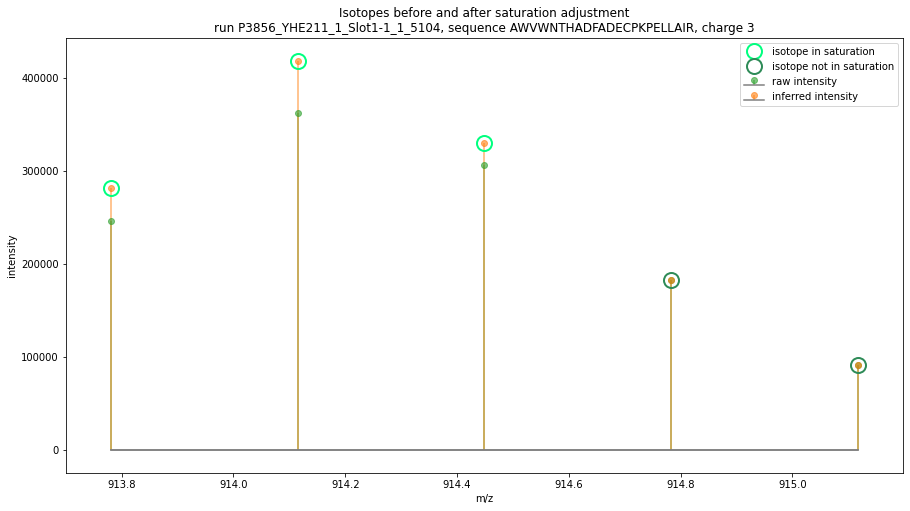

In [18]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(isotope_intensities_df.mz, isotope_intensities_df.intensity, use_line_collection=True, label='raw intensity')
plt.setp(markerline, 'color', 'tab:green')
plt.setp(stemlines, 'color', 'tab:green')
plt.setp(baseline, 'color', colors[7])
plt.setp(markerline, 'alpha', 0.6)
plt.setp(stemlines, 'alpha', 0.6)

markerline, stemlines, baseline = ax.stem(isotope_intensities_df.mz, isotope_intensities_df.inferred_intensity, use_line_collection=True, label='inferred intensity')
plt.setp(markerline, 'color', 'tab:orange')
plt.setp(stemlines, 'color', 'tab:orange')
plt.setp(baseline, 'color', colors[7])
plt.setp(markerline, 'alpha', 0.6)
plt.setp(stemlines, 'alpha', 0.6)

# highlight the isotopes with inferred intensity
adjusted_intensity_df = isotope_intensities_df[(isotope_intensities_df.inferred == True)]
ax.plot(adjusted_intensity_df.mz, adjusted_intensity_df.inferred_intensity, marker='o', markerfacecolor='none', markeredgecolor='springgreen', linestyle='', markeredgewidth=2, ms=15, label='isotope in saturation')

# highlight the isotopes without inferred intensity
not_adjusted_intensity_df = isotope_intensities_df[(isotope_intensities_df.inferred == False)]
ax.plot(not_adjusted_intensity_df.mz, not_adjusted_intensity_df.inferred_intensity, marker='o', markerfacecolor='none', markeredgecolor='seagreen', linestyle='', markeredgewidth=2, ms=15, label='isotope not in saturation')

plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(8)
f.set_figwidth(15)
plt.margins(0.06)
plt.legend(loc='best')
plt.title('Isotopes before and after saturation adjustment\nrun {}, sequence {}, charge {}'.format(RUN_NAME, selected_sequence.sequence, selected_sequence.charge))
plt.show()

#### distribution of isotopes in saturation

In [12]:
df = extracted_features_df[(extracted_features_df.isotope_idx_not_in_saturation > 0)]

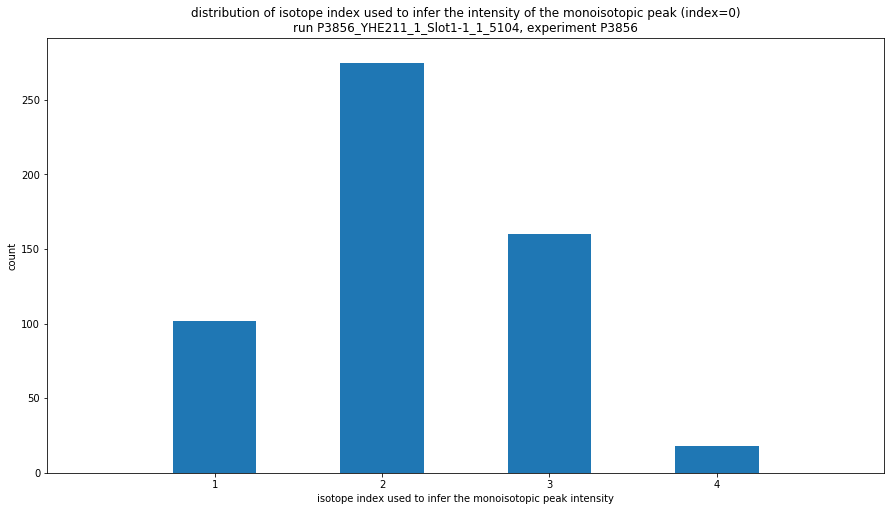

In [23]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

counts = np.bincount(df.isotope_idx_not_in_saturation)
ax1.bar(range(df.isotope_idx_not_in_saturation.max()+1), counts, width=0.5, align='center')
ax1.set(xticks=range(1,df.isotope_idx_not_in_saturation.max()+1), xlim=[0, df.isotope_idx_not_in_saturation.max()+1])

plt.xlabel('isotope index used to infer the monoisotopic peak intensity')
plt.ylabel('count')
plt.title('distribution of isotope index used to infer the intensity of the monoisotopic peak (index=0)\nrun {}, experiment {}'.format(RUN_NAME, EXPERIMENT_NAME))

plt.show()